In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [7]:
data = pd.read_csv("C:\\Users\\Khizer Ali\\Desktop\\DTC\\bank.csv")

In [8]:
x = data.iloc[:, :-1]  
y = data.iloc[:, -1]   

In [9]:
print(f"Unique target labels: {y.unique()}")

Unique target labels: ['no' 'yes']


In [10]:
x = pd.get_dummies(x)

In [11]:
x.fillna(x.mean(), inplace=True)

In [12]:
names_features = x.columns
target_labels = y.unique()


In [13]:
if y.dtype == 'object':
    y = pd.factorize(y)[0]
    target_labels = np.unique(y)

In [14]:
if y.dtype == 'object':
    y = pd.factorize(y)[0]
    target_labels = np.unique(y)

In [16]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=93)
dtc = DecisionTreeClassifier(max_depth=3, random_state=93)
dtc.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=93)

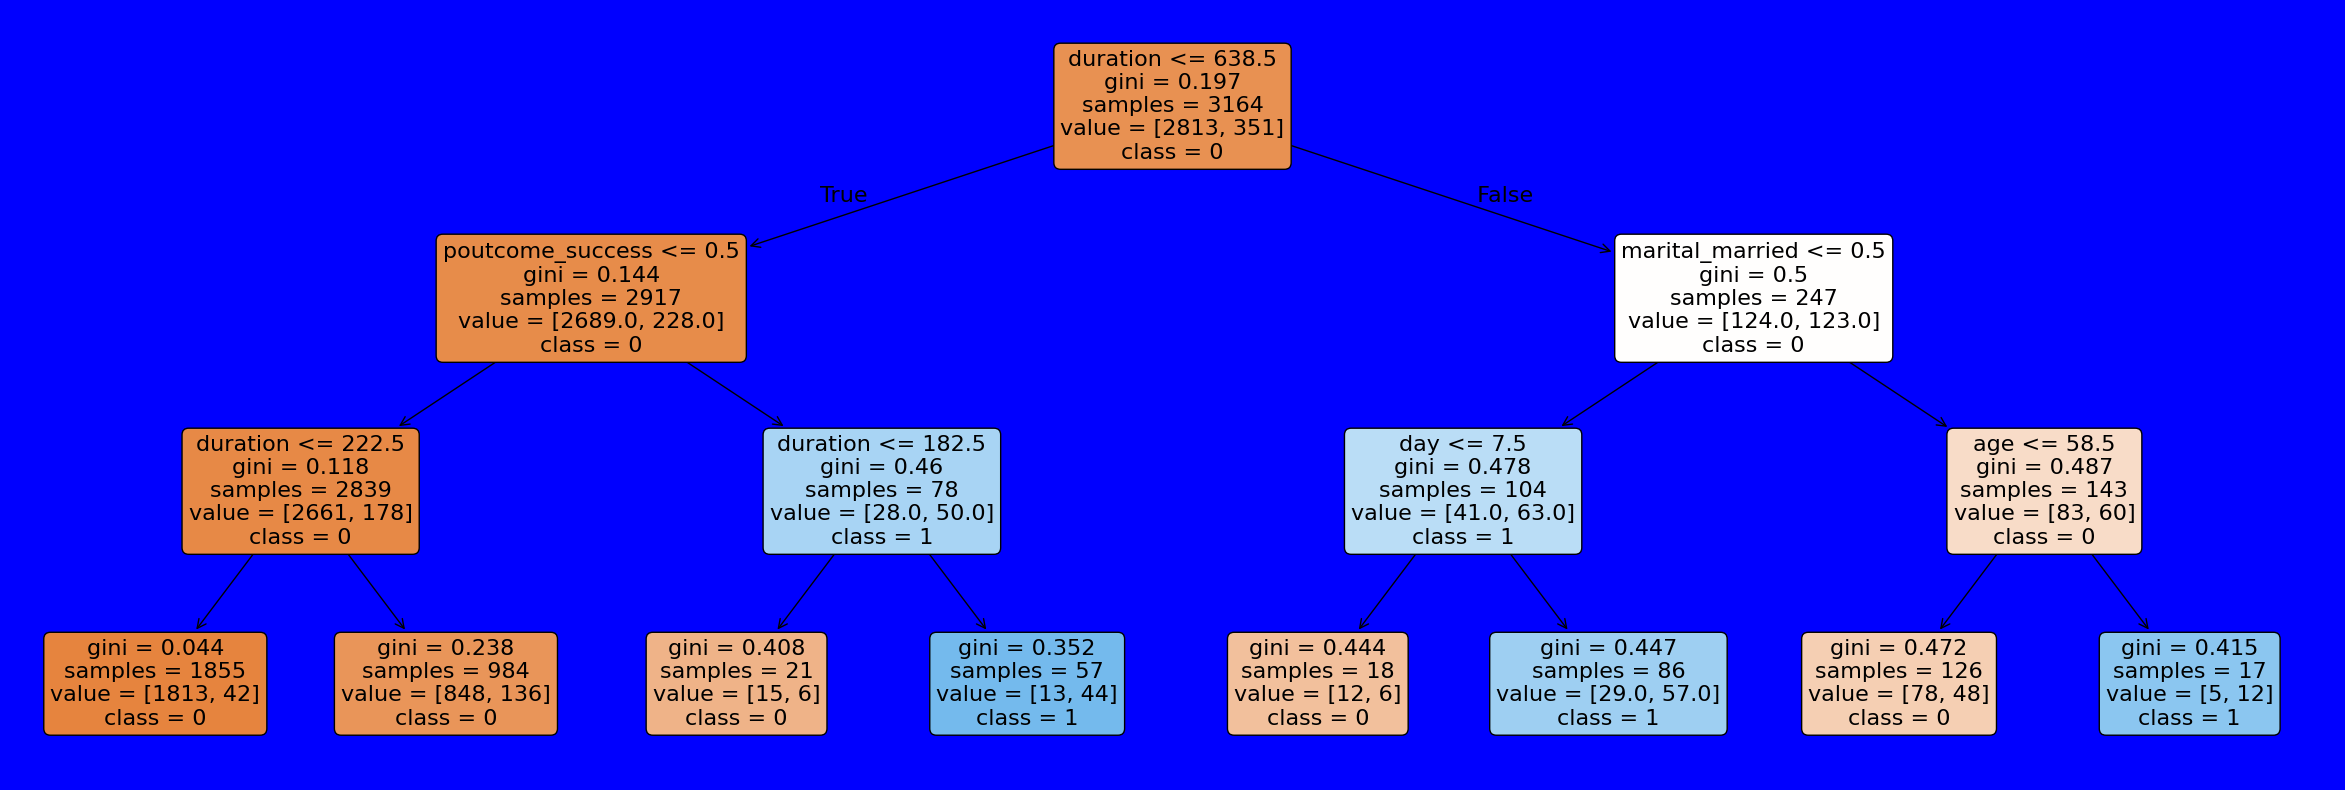

In [17]:
plt.figure(figsize=(30, 10), facecolor='b')
tree.plot_tree(dtc, feature_names=names_features, class_names=target_labels.astype(str), rounded=True, filled=True, fontsize=16)
plt.show()


In [18]:
y_pred = dtc.predict(x_test)


In [19]:

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
matrix = pd.DataFrame(confusion_matrix)

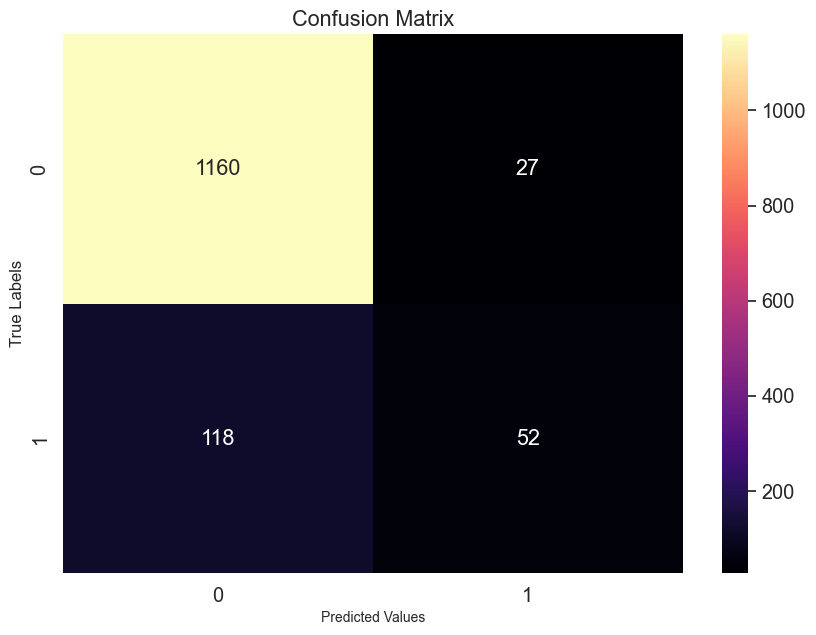

In [20]:
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.3)
axis = sns.heatmap(matrix, annot=True, fmt='g', cmap='magma', xticklabels=target_labels, yticklabels=target_labels)
axis.set_title("Confusion Matrix")
axis.set_xlabel('Predicted Values', fontsize=10)
axis.set_ylabel('True Labels', fontsize=12)
plt.show()